<a href="https://colab.research.google.com/github/alfianyaqien/studuapps/blob/machine-learning/mobilenet_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download the dataset
import pathlib
from google.colab import drive
drive.mount('/content/gdrive')
data_dir = "gdrive/My Drive/Anything about capstone/Baby"
data_dir = pathlib.Path(data_dir)

Mounted at /content/gdrive


In [2]:
data_dir = "gdrive/My Drive/Anything about capstone/Baby"
data_dir = pathlib.Path(data_dir)
print(data_dir)

gdrive/My Drive/Anything about capstone/Baby


In [3]:
import os

# Assign training and validation set directories
data_dir = "gdrive/My Drive/Anything about capstone/Baby"
train_dir = os.path.join(data_dir, 'Training')
validation_dir = os.path.join(data_dir, 'Validation')

# Directory with training Makanan cocok untuk bayi pictures
train_cocok_dir = os.path.join(train_dir, 'Cocok untuk bayi')

# Directory with training dog pictures
train_tidak_dir = os.path.join(train_dir, 'Tidak cocok untuk bayi')

# Directory with validation cat pictures
validation_cocok_dir = os.path.join(validation_dir, 'Cocok untuk bayi')

# Directory with validation dog pictures
validation_tidak_dir = os.path.join(validation_dir, 'Tidak cocok untuk bayi')

In [4]:
print('total training bahan makanan yang cocok untuk bayi:', len(os.listdir(train_cocok_dir)))
print('total training bahan makanan yang tidak cocok untuk bayi:', len(os.listdir(train_tidak_dir)))
print('total validation bahan makanan yang cocok untuk bayi:', len(os.listdir(validation_cocok_dir)))
print('total validation bahan makanan yang tidak cocok untuk bayi:', len(os.listdir(validation_tidak_dir)))

cocok_files = os.listdir(train_cocok_dir)
print(cocok_files[:10])

tidak_files = os.listdir(train_tidak_dir)
print(tidak_files[:10])

total training bahan makanan yang cocok untuk bayi: 1224
total training bahan makanan yang tidak cocok untuk bayi: 739
total validation bahan makanan yang cocok untuk bayi: 147
total validation bahan makanan yang tidak cocok untuk bayi: 136
['200_40efba91.jpg', '228_7ac8d3a1.jpg', '040_6aaabfd9.jpg', '077_32116b02.jpg', '107_cbb74b90.jpg', '174_66497e6d.jpg', '191_4fad62af.jpg', '235_e78577ef.jpg', '096_2e8cb15a.jpg', '095_8f8426bd.jpg']
['019_0211c332.jpg', '029_d5474e44.jpg', '022_1cee9f12.jpg', '021_86c3271a.jpg', '027_4018280f.jpg', '026_7aee7738.jpg', '030_ea79acea.jpg', '028_f3abf0c4.jpg', '018_a309da6b.jpg', '017_404cebbe.jpg']


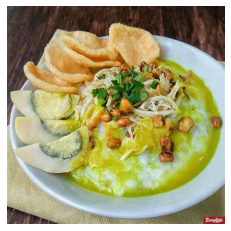

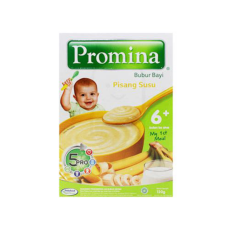

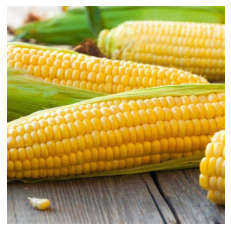

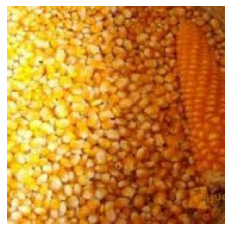

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_cocok = [os.path.join(train_cocok_dir, fname) 
                for fname in cocok_files[pic_index-2:pic_index]]
next_tidak = [os.path.join(train_tidak_dir, fname) 
                for fname in tidak_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_cocok+next_tidak):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data Augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary',
        shuffle=True
        )

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary',
        shuffle=False)

Found 1963 images belonging to 2 classes.
Found 283 images belonging to 2 classes.


In [9]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

!wget --no-check-certificate \
    https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_no_top.h5 \
    -O /tmp/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_no_top.h5

--2022-06-06 00:16:10--  https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_no_top.h5
Resolving tfhub.dev (tfhub.dev)... 172.253.62.102, 172.253.62.101, 172.253.62.113, ...
Connecting to tfhub.dev (tfhub.dev)|172.253.62.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/tmp/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_no_top.h5’

/tmp/mobilenet_v2_w     [ <=>                ]   1.21K  --.-KB/s    in 0s      

2022-06-06 00:16:10 (15.7 MB/s) - ‘/tmp/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_no_top.h5’ saved [1237]



In [7]:
import tensorflow_hub as hub

In [10]:
mobile_net_layers = hub.KerasLayer(mobilenet_v2, input_shape=(224,224,3), trainable= False)


In [13]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
# Setup the model layers

model = tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape=(224,224,3)),
                             mobile_net_layers,
                   tf.keras.layers.Flatten(),
                   tf.keras.layers.Dropout(0.25),
                   tf.keras.layers.BatchNormalization(),
                   tf.keras.layers.Dense(512, activation='relu'),
                   tf.keras.layers.Dense(units=1, activation="sigmoid")
  ])

from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

In [14]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 batch_normalization (BatchN  (None, 1280)             5120      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                        

In [15]:
# Constant for epochs
EPOCHS = 10
steps_per_epoch=20

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=steps_per_epoch,
      epochs=EPOCHS,
      validation_data=validation_generator,
      verbose = 2,
      shuffle=True)

Epoch 1/10
20/20 - 133s - loss: 0.5189 - accuracy: 0.7725 - val_loss: 0.2409 - val_accuracy: 0.9011 - 133s/epoch - 7s/step
Epoch 2/10
20/20 - 73s - loss: 0.3855 - accuracy: 0.8600 - val_loss: 0.2667 - val_accuracy: 0.9011 - 73s/epoch - 4s/step
Epoch 3/10
20/20 - 61s - loss: 0.4107 - accuracy: 0.8525 - val_loss: 0.1992 - val_accuracy: 0.9117 - 61s/epoch - 3s/step
Epoch 4/10
20/20 - 47s - loss: 0.3155 - accuracy: 0.8775 - val_loss: 0.1870 - val_accuracy: 0.9364 - 47s/epoch - 2s/step
Epoch 5/10
20/20 - 48s - loss: 0.3003 - accuracy: 0.8775 - val_loss: 0.1709 - val_accuracy: 0.9329 - 48s/epoch - 2s/step
Epoch 6/10
20/20 - 41s - loss: 0.2653 - accuracy: 0.9000 - val_loss: 0.1448 - val_accuracy: 0.9505 - 41s/epoch - 2s/step
Epoch 7/10
20/20 - 36s - loss: 0.2612 - accuracy: 0.8975 - val_loss: 0.1335 - val_accuracy: 0.9505 - 36s/epoch - 2s/step
Epoch 8/10
20/20 - 33s - loss: 0.2184 - accuracy: 0.9150 - val_loss: 0.1604 - val_accuracy: 0.9293 - 33s/epoch - 2s/step
Epoch 9/10
20/20 - 33s - loss:

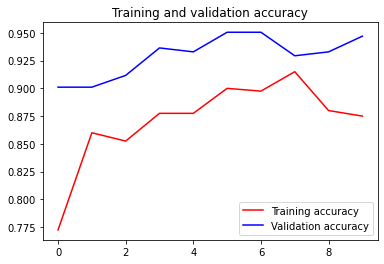

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

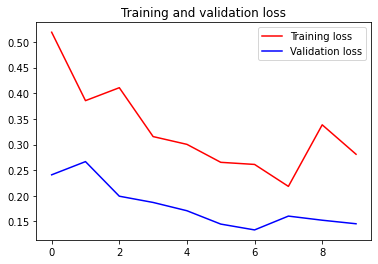

<Figure size 432x288 with 0 Axes>

In [17]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
## CODE BLOCK FOR NON-SAFARI BROWSERS
## SAFARI USERS: PLEASE SKIP THIS BLOCK AND RUN THE NEXT ONE INSTEAD

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)

  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is bahan makanan tidak cocok untuk bayi")

  else:
    print(fn + " is bahan makanan cocok untuk bayi")

Saving apel-2.jpg to apel-2.jpg
apel-2.jpg
[0.21082713]
apel-2.jpg is bahan makanan cocok untuk bayi


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Classification Report
                                           precision    recall  f1-score   support

      Bahan makanan yang cocok untuk bayi       0.52      1.00      0.68       147
Bahan makanan yang tidak cocok untuk bayi       0.00      0.00      0.00       136

                                 accuracy                           0.52       283
                                macro avg       0.26      0.50      0.34       283
                             weighted avg       0.27      0.52      0.36       283



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


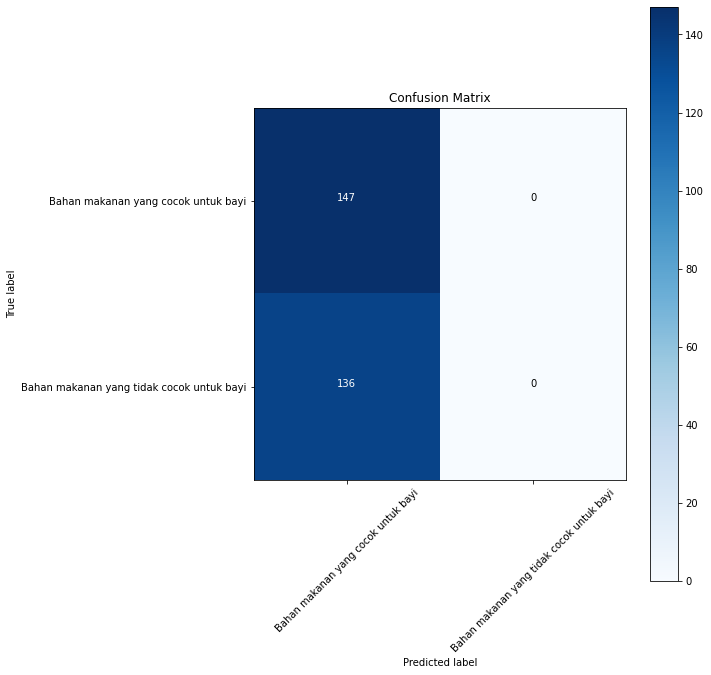

In [24]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Some reports
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#On test dataset
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['Bahan makanan yang cocok untuk bayi', 'Bahan makanan yang tidak cocok untuk bayi']

#Confution Matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

#Classification Report
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

In [19]:
print(validation_generator.classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [20]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [21]:
Y_pred

array([[2.24971771e-03],
       [8.55046511e-03],
       [7.41170661e-05],
       [1.49716437e-02],
       [2.30550766e-04],
       [7.48181343e-03],
       [2.07853317e-03],
       [4.31949377e-01],
       [2.97123194e-03],
       [3.32312167e-01],
       [1.15693510e-02],
       [9.10192728e-04],
       [3.64577770e-03],
       [2.99349427e-03],
       [3.00124288e-03],
       [8.09460878e-04],
       [5.22362134e-05],
       [5.40474951e-02],
       [1.31145120e-03],
       [2.33578682e-03],
       [2.47210264e-03],
       [2.96616256e-02],
       [7.64565945e-01],
       [7.09375739e-03],
       [1.79827213e-03],
       [2.91798413e-02],
       [9.19851118e-06],
       [8.06516409e-03],
       [1.55907869e-03],
       [3.17217946e-01],
       [2.91918755e-01],
       [1.64222181e-01],
       [6.18931651e-03],
       [3.42100859e-04],
       [1.13291204e-01],
       [7.14284182e-03],
       [1.78073704e-01],
       [1.49756670e-04],
       [1.19698048e-03],
       [6.61349297e-03],


In [ ]:
Y_pred = model.predict_generator(validation_generator)
print(Y_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


[[0.96792674]
 [0.95718974]
 [0.9980464 ]
 [0.00301803]
 [0.9064477 ]
 [0.9895672 ]
 [0.09904879]
 [0.8110339 ]
 [0.9749435 ]
 [0.9846459 ]
 [0.9487127 ]
 [0.9723803 ]
 [0.4929186 ]
 [0.46638274]
 [0.0669137 ]
 [0.9966394 ]
 [0.95885473]
 [0.1966176 ]
 [0.9764098 ]
 [0.02404739]
 [0.95407826]
 [0.00280092]
 [0.04548385]
 [0.9924368 ]
 [0.06535656]
 [0.384097  ]
 [0.42473018]
 [0.13464294]
 [0.00601318]
 [0.2428121 ]
 [0.01438628]
 [0.2577181 ]
 [0.92332417]
 [0.9974172 ]
 [0.0057793 ]
 [0.00358109]
 [0.9883207 ]
 [0.06755336]
 [0.0055392 ]
 [0.847268  ]
 [0.8376548 ]
 [0.07299532]
 [0.9990631 ]
 [0.0177431 ]
 [0.97206825]
 [0.0135577 ]
 [0.70123506]
 [0.03540816]
 [0.35902384]
 [0.95553356]
 [0.01088637]
 [0.02381428]
 [0.95408213]
 [0.04000383]
 [0.850825  ]
 [0.04372672]
 [0.18920542]
 [0.47799835]
 [0.927409  ]
 [0.08024187]
 [0.9796169 ]
 [0.15995356]
 [0.9885542 ]
 [0.0411745 ]
 [0.9988937 ]
 [0.0318372 ]
 [0.48768663]
 [0.00337758]
 [0.6967232 ]
 [0.18929902]
 [0.9821659 ]
 [0.96

In [ ]:
# Some reports
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#On test dataset
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['Bahan makanan yang cocok untuk bayi', 'Bahan makanan yang tidak cocok untuk bayi']

#Confution Matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

#Classification Report
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

In [ ]:
import cv2
stream = cv2.VideoCapture(0) # 0 means read from local camera.